In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks NLP/data/Total_Prep.csv')
df.shape

(5910, 2)

In [5]:
df.head()

,Beispiel,Kennzeichen
0,Objekt zur Erfassung und Darstellung von\nInfo...,B
1,Erkennungsobjekt,B
2,Erkennungsobjekt für elektrisches Potential,BA
3,Objekt zur Erkennung von\nelektrischem Potential,BA
4,Kopplungskondensator,BA


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Beispiel     5910 non-null   object
 1   Kennzeichen  5910 non-null   object
dtypes: object(2)
memory usage: 92.5+ KB


In [7]:
# Enthällt keine nan

In [8]:
df.describe()

,Beispiel,Kennzeichen
count,5910,5910
unique,5008,963
top,kombinierte Aufgaben,UL
freq,14,69


In [9]:
df['Kennzeichen'].value_counts(dropna=False)

UL     69
PG     43
BG     34
UB     34
UM     31
       ..
MZ      1
HZ      1
FZ      1
EF      1
WG_     1
Name: Kennzeichen, Length: 963, dtype: int64

In [10]:
print("Mean:\t\t", df['Kennzeichen'].value_counts(dropna=False).mean())
print("Variance:\t", df['Kennzeichen'].value_counts(dropna=False).var())
print("Max:\t\t", df['Kennzeichen'].value_counts(dropna=False).max())
print("Min:\t\t", df['Kennzeichen'].value_counts(dropna=False).min())
print("Count:\t\t", df['Kennzeichen'].value_counts(dropna=False).count())

Mean:		 6.137071651090342
Variance:	 34.97287582334312
Max:		 69
Min:		 1
Count:		 963


In [12]:
# Es sind 963 Label im mittel mit einem Mittelwert von 6 Einträgen pro Label
# was sehr wenige sind.

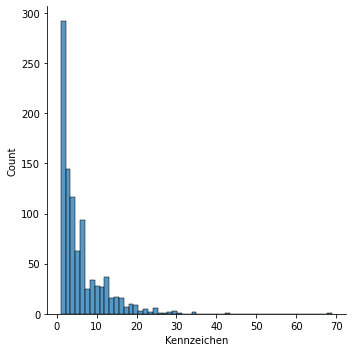

In [13]:
sns.displot(df['Kennzeichen'].value_counts(dropna=False))

In [ ]:
# Die Verteilung zeigt das die Einträge nicht gleichmässig über die Label verteilt sind. 
# -> Die Daten sind unbalanced. -> F1-Score
# -> Es ist ein Multi-Class Classifier gefragt
# -> Erschwerend kommt hinzu das viele Kennzeichen nur vereinzelte Einträge haben.

In [14]:
#######################################
# Export to CSV
#######################################
from pathlib import Path
file_name = "drive/MyDrive/Colab Notebooks NLP/data/Total_Aly.csv"
file_path = (Path().resolve() / file_name).as_posix()
df.to_csv(file_path, index=False)

In [15]:
df.head(20)

,Beispiel,Kennzeichen
0,Objekt zur Erfassung und Darstellung von\nInfo...,B
1,Erkennungsobjekt,B
2,Erkennungsobjekt für elektrisches Potential,BA
3,Objekt zur Erkennung von\nelektrischem Potential,BA
4,Kopplungskondensator,BA
5,Messspannungsrelais,BA
6,Spannungswandler für Messzwecke,BA
7,Spannungsrelais,BA
8,Spannungswandler,BA
9,Erkennungsobjekt für Widerstand oder\nLeitfähi...,BB


In einem nächsten Schritt habe ich in Excel noch ein paar Unschönheiten bereinigt. Es hat einige Wörter enthalten wie z.B.  elektrischeSchalttafel. Vermutlich kommt das aus dem Import aus dem PDF und waren dort zwei Wörter. Der Einfachheit halber habe ich eines daraus gemacht und den Grossbuchstaben klein gesetzt. Hier die Formel dazu:



```
=IF((LEN(TRIM(B1514))-LEN(SUBSTITUTE(B1514," ",""))+1)>1,TRIM(B1514),
IF(EXACT(RIGHT(TRIM(B1514),LEN(TRIM(B1514))-1),RIGHT(LOWER(TRIM(B1514)),
LEN(TRIM(B1514))-1)),TRIM(B1514),CONCAT(LEFT(TRIM(B1514),1),
RIGHT(LOWER(TRIM(B1514)),LEN(TRIM(B1514))-1))))
```



Weiter habe ich die Whitespaces am Anfang und Ende entfärnt wie auch die New Lines in den Sätzen. Hier die Formel:



```
=SUBSTITUTE(SUBSTITUTE([@Beispiel2],CHAR(13)," "),CHAR(10)," ")
```



Das bearbeitete File habe ich "Total_AlyMan.csv" genannt.

In [16]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks NLP/data/Total_AlyMan.csv')
df.shape

(5841, 2)

In [17]:
df.head(20)

,Kennzeichen,Beispiel
0,BA,Erkennungsobjekt für elektrisches Potential
1,BA,Objekt zur Erkennung von elektrischem Potential
2,BA,Kopplungskondensator
3,BA,Messspannungsrelais
4,BA,Spannungswandler für Messzwecke
5,BA,Spannungsrelais
6,BA,Spannungswandler
7,BB,Erkennungsobjekt für Widerstand oder Leitfähig...
8,BB,Objekt zur Erkennung von Widerstand
9,BB,Detektor für elektrischen Widerstand


Nun sind die Daten soweit bereit das damit um damit ein Modell zu trainieren.